<a href="https://colab.research.google.com/github/AftabUdaipurwala/Deeplearning/blob/main/Stochastic_Gradient_Descent_vs_Batch_Gradient_Descent_vs_Mini_Batch_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy
import pandas as pd
import numpy as np
from sklearn import linear_model
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras



In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls '/content/drive/MyDrive/py-master/DeepLearningML/8_sgd_vs_gd/'

gd_and_sgd.ipynb	 homeprices.csv
gradient_descent.ipynb	 hp.jpg
gradient_descent.py	 mini_batch_gd_exercise_solution.ipynb
homeprices_banglore.csv  mini_batch_gd.ipynb


In [5]:
df = pd.read_csv('/content/drive/MyDrive/py-master/DeepLearningML/8_sgd_vs_gd/homeprices_banglore.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


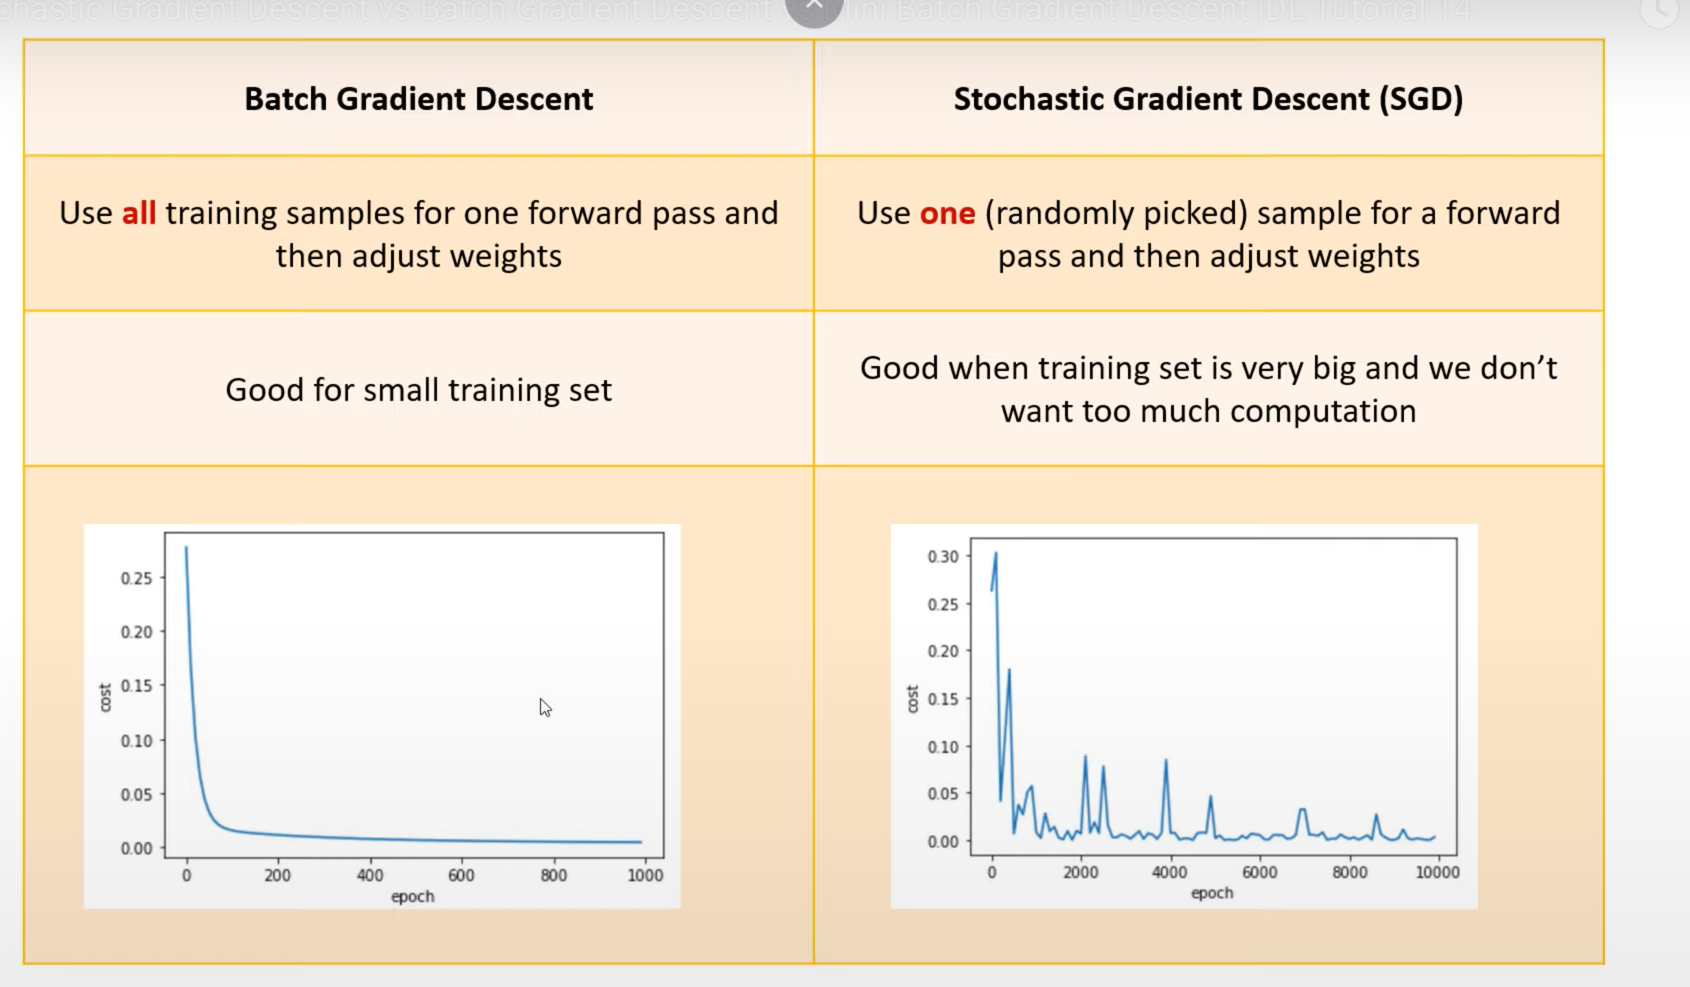

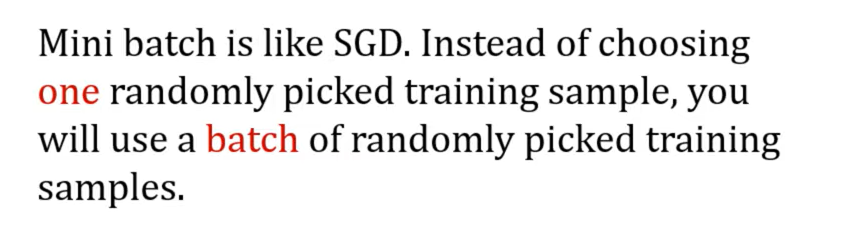

In [6]:
# perform scaling so that Ml model performs better than as is data
from sklearn import preprocessing
sx= preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(df.drop('price', axis ='columns'))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [7]:
scaled_y = sy.fit_transform(df.price.values.reshape(df.shape[0],1))
scaled_y


array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [8]:
def batch_gradiant_descent(x,y_true,epochs,learning_rate=0.01):
  number_of_features = x.shape[1]
  w= np.ones(shape=(number_of_features))
  b= 0
  total_samples = x.shape[0]
  cost_list=[]
  epoch_list=[]
  for i in range(epochs):
    y_predicted = np.dot(w,x.T)+b #w1*area + w2*bedrooms
    w_grad = -(2/total_samples)*(x.T.dot(y_true-y_predicted))
    b_grad = -(2/total_samples)*(np.sum(y_true-y_predicted))
    w = w-learning_rate*w_grad
    b=  b-learning_rate*b_grad
    cost= np.mean(np.square(y_true-y_predicted))
    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w,b,cost, cost_list, epoch_list

In [9]:
w,b,cost,cost_list,epoch_list = batch_gradiant_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

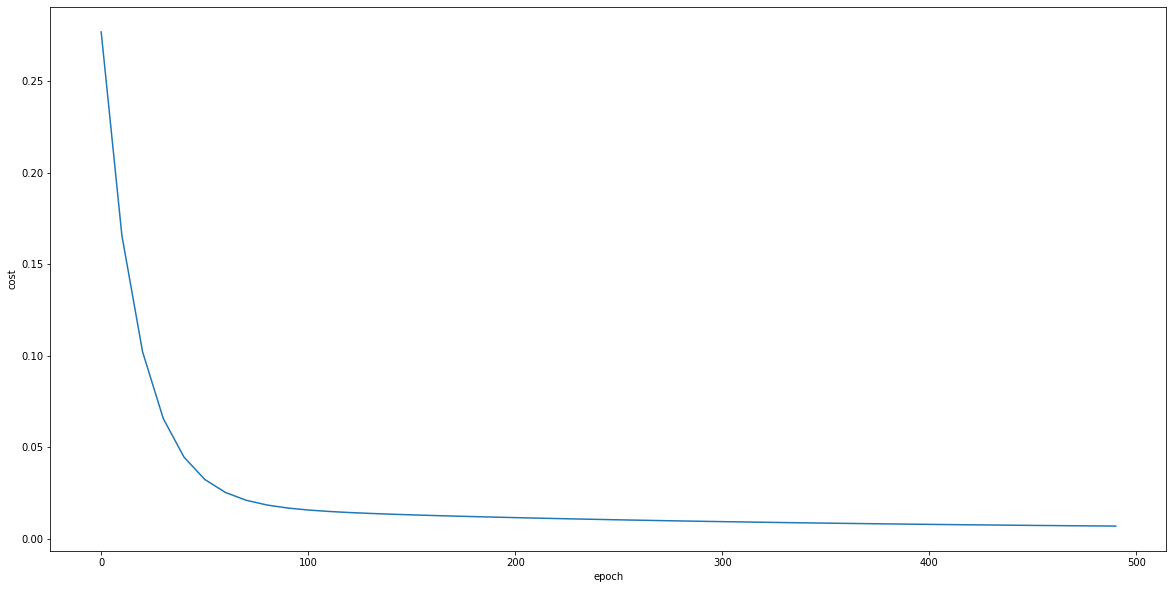

In [10]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [11]:
def predict(area,bedrooms,w,b):
  scaled_x = sx.transform([[area,bedrooms]])[0]
  scaled_y = w[0]*scaled_x[0] + w[1]*scaled_x[1]+b
  price = sy.inverse_transform([[scaled_y]])[0][0]
  return price


In [12]:
predict(2500,3,w,b)

102.39647915852096

# ***Stochaistic Gradiant Descent***

In [13]:
def stochaistic_gradiant_descent(x,y_true,epochs,learning_rate=0.01):
  import random
  number_of_features = x.shape[1]
  w= np.ones(shape=(number_of_features))
  b= 0
  total_samples = x.shape[0]
  cost_list=[]
  epoch_list=[]
  for i in range(epochs):
    random_index = random.randint(0,total_samples-1)
    sample_x = x[random_index]
    sample_y = y_true[random_index]
    y_predicted = np.dot(w,sample_x.T)+b #w1*area + w2*bedrooms
    w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
    b_grad = -(2/total_samples)*(np.sum(sample_y-y_predicted))
    w = w-learning_rate*w_grad
    b=  b-learning_rate*b_grad
    cost= np.square(sample_y-y_predicted)
    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w,b,cost, cost_list, epoch_list

In [14]:
w,b,cost, cost_list, epoch_list= stochaistic_gradiant_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),50000)
w,b,cost

(array([0.68640939, 0.50605941]), -0.1350167878753612, 3.8322390445275575e-05)

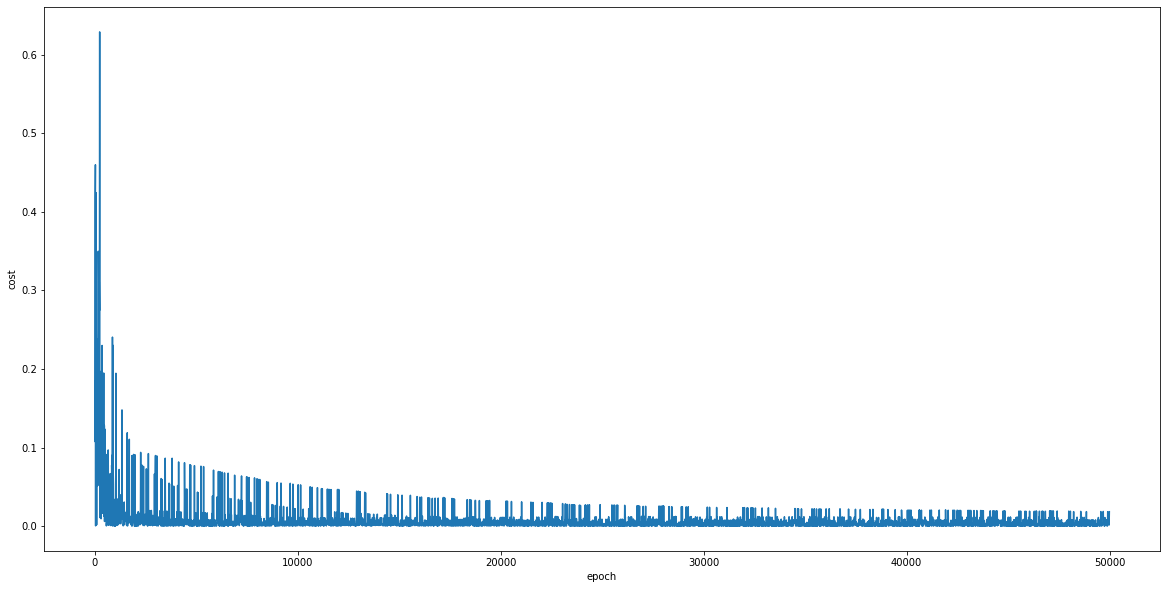

In [15]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [16]:
predict(2500,3,w,b)

102.25276339464602

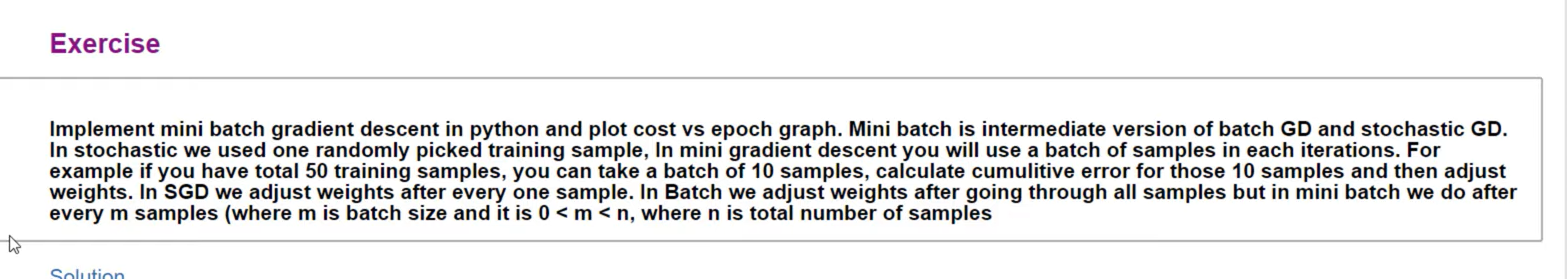

# ***Mini Batch Gradiant Descent***

In [31]:
def mini_batch_gradiant_descent(x,y_true,epochs,learning_rate=0.01):
  import random
  number_of_features = x.shape[1]
  w= np.ones(shape=(number_of_features))
  b= 0
  total_samples = x.shape[0]
  cost_list=[]
  epoch_list=[]
  for i in range(epochs):
    random_index = random.randint(0,total_samples-1)
    sample_x = x[random_index: random_index+10]
    sample_y = y_true[random_index: random_index+10]
    y_predicted = np.dot(w,sample_x.T)+b #w1*area + w2*bedrooms
    w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
    b_grad = -(2/total_samples)*(np.sum(sample_y-y_predicted))
    w = w-learning_rate*w_grad
    b=  b-learning_rate*b_grad
    cost= np.mean(np.square(sample_y-y_predicted))
    if i%10==0:
      cost_list.append(cost)
      epoch_list.append(i)

  return w,b,cost, cost_list, epoch_list

In [32]:
w,b,cost, cost_list, epoch_list= mini_batch_gradiant_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),50000)
w,b,cost

(array([0.91183412, 0.20641049]), -0.07482298898174444, 0.00214249622304076)

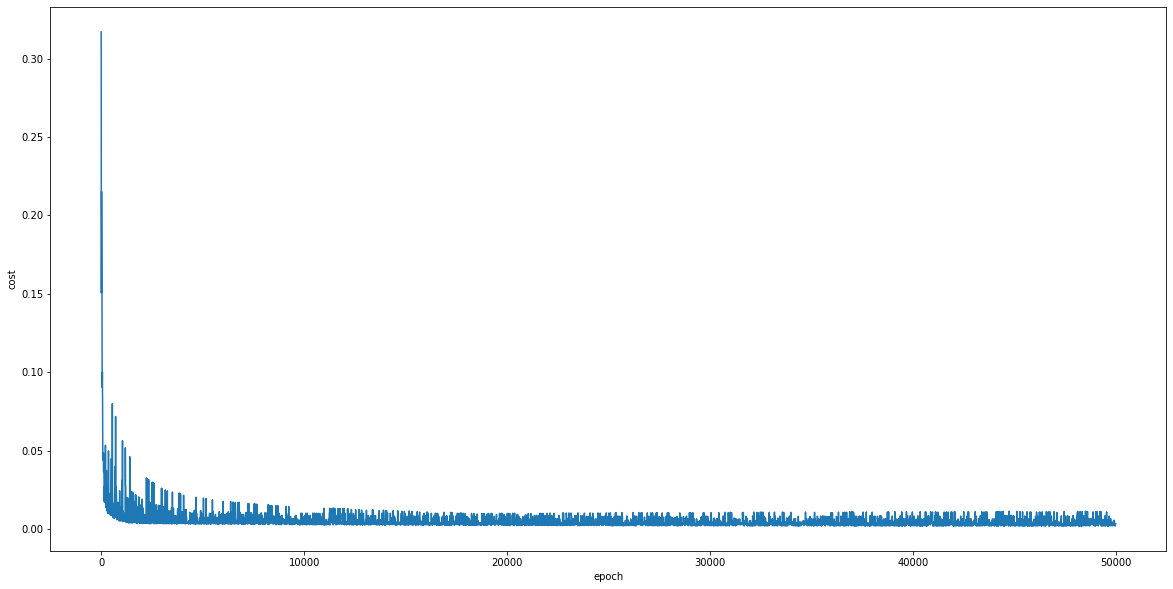

In [33]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)

In [34]:
predict(2500,3,w,b)

107.99227044561862